<a href="https://colab.research.google.com/github/almeidamariana/pyspark_GLP/blob/main/manipula%C3%A7%C3%A3o_de_dados_com_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de dados com PySpark**

**Objetivo**

Aprimorar minhas habilidades em PySpark, alinhando-as às melhores práticas de processamento distribuído.

**Sobre os dados**

O Brasil passa por um aumento significativo de preços, inclusive do GLP - Gás Liquefeito de Petróleo, distribuído para a população em botijões de 13Kg, e que é popularmanete conhecido como Gás de Cozinha ou Botijão de Gás. Em sua grande maioria são acoplados em fogões e utilizados como combustíveis, principalmente para cozinhar alimentos. Portanto, é um item de extrema importância para toda população Brasileira e que entender a distribuição de preços nas mais diversas regiões e unidades da federação do país se faz extremamente necessário.

Serão utilizados os dados resultantes de uma pesquisa conduzida no mês de dezembro de 2021 pela ANP e divulgada no portal de dados abertos do Governo Federal do Brasil.

## **Preparando o ambiente para utilizar o PySpark**

### **Instalando o Java**

O Apache Spark depende de outros sistemas, portanto, antes do Spark é preciso instalar as dependências. Primeiro, deve-se instalar o Java.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

### **Instalando o Apache Spark**

Em seguida, é preciso fazer o download do Spark e do Hadoop, pois o Apache Spark roda sob o HDFS (Hadoop Distributed File System - camada de armazenamento), na máquina virtual (Google Colab nesse caso).

In [ ]:
# Fazendo download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

### **Configurando o ambiente**

É preciso informar o sistema onde encontrar o Java e o Spark já instalados.

In [ ]:
# Importando a biblioteca os
import os

# Os.environ é um objeto de mapeamento que mapeia as variáveis ​​ambientais do usuário
# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

Instalar a biblioteca *findspark*, que vai permitir importar pacotes necessários para o funcionamento do pyspark.



In [ ]:
# instalando a findspark
!pip install -q findspark

In [ ]:
#importando a findspark
import findspark

# iniciando o findspark
findspark.init()

## **Iniciando o PySpark**

O Apache Spark é uma plataforma poderosa para processamento distribuído de grandes conjuntos de dados. Para começar a trabalhar com o Spark usando a API PySpark, é necessário um ponto de entrada principal: a SparkSession. A SparkSession atua como a porta de entrada para todas as operações e funcionalidades oferecidas pelo Spark.


In [ ]:
# Pacote necessário para manipulação de dados
from pyspark.sql import SparkSession

1. **SparkSession.builder:** é o ponto de partida para configurar e criar uma instância do SparkSession.

2. **master('local[*]'):** significa que o Spark será executado no modo de execução local com todos os núcleos disponíveis.

3. **getOrCreate():** cria uma instância do SparkSession se ela ainda não existir ou retorna a instância existente se já estiver criada.

Em resumo, o código cria uma instância do SparkSession configurada para executar o Spark no modo local com todos os núcleos disponíveis. Essa instância do SparkSession é a porta de entrada para executar operações e tarefas no Apache Spark.

In [ ]:
# Iniciando o spark context - criando uma sessão
sc = SparkSession.builder.master('local[*]').getOrCreate()

# Verificando se a sessão foi criada
sc

## **Ingestão dos dados para o Apache Spark**

In [ ]:
# download de um conjunto de dados aberto
# fonte: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
# mês 12 de 2021
!wget --verbose --show-progress --no-check-certificate https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv

--2023-10-19 17:16:15--  https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv
Resolving www.gov.br (www.gov.br)... 161.148.164.31
Connecting to www.gov.br (www.gov.br)|161.148.164.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623526 (2.5M) [text/csv]
Saving to: ‘dados-abertos-precos-2021-12-glp.csv’

dados-abertos-preco 100%[===================>]   2.50M   760KB/s    in 3.4s    

2023-10-19 17:16:19 (760 KB/s) - ‘dados-abertos-precos-2021-12-glp.csv’ saved [2623526/2623526]



**Utilizando o Apache Spark para ler um arquivo CSV**

O argumento inferSchema=True é usado para fazer o Spark inferir automaticamente o tipo de dados de cada coluna com base no conteúdo do arquivo CSV.

In [ ]:
 # Carregando o conjunto de dados na sessão do spark (sc)
 # header = TRUE -> primeira linha como cabeçalho
precogas = sc.read.csv("/content/dados-abertos-precos-2021-12-glp.csv",
                       inferSchema=True, header=True,
                       sep = ';',
                       encoding = "UTF-8")

In [ ]:
# Verificando o tipo de objeto criado
type(precogas) # conjunto de dados particionado

pyspark.sql.dataframe.DataFrame

In [ ]:
# Ver as 5 primeiras linhas
precogas.show(5)

+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+-------+--------------+--------------+---------------+-----------------+---------+
|Regiao - Sigla|Estado - Sigla|  Municipio|             Revenda|    CNPJ da Revenda|        Nome da Rua|Numero Rua|Complemento|        Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida| Bandeira|
+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+-------+--------------+--------------+---------------+-----------------+---------+
|            SE|            SP|SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81|RUA MANOEL DE ABREU|       790| QUADRA 108|CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg| CONSIGAZ|
|             N|            AC| RIO BRANCO|AUTO POSTO AMAPA 

## **Conhecendo a estrutura do SparkDataFrame**

A biblioteca **pyspark** fornece as funcionalidades básicas para processamento de dados distribuído no Spark.

A biblioteca **pyspark.sql** estende essas funcionalidades para facilitar o trabalho com dados estruturados, tornando-o mais adequado para análise de dados, processamento ETL (Extract, Transform, Load) - permitindo consultas SQL, agregações, filtros e transformações -.

A importação de todas as funções do pacote com o uso do asterisco (*) é uma maneira conveniente de tornar todas as funções imediatamente disponíveis no ambiente de programação, sem a necessidade de especificar cada função individualmente.


In [ ]:
# Estrutura do SparkDataFrame
from pyspark import *
from pyspark.sql import *

# Manipulação de colunas - importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *


In [ ]:
# Contando o número de linhas do dataset
precogas.count()

15765

In [ ]:
# Contando o número de colunas do dataset
len(precogas.columns)

16

In [ ]:
# Verificando o schema() deste sparkdataframe
# Outro método para verificar o tipo dos atributos do dataset: precogas.dtypes
precogas.printSchema()

Uma vez que todas as variáveis foram reconhecidas como string, ao aplicar a função describe para verificar valores faltantes e obter medidas descritivas teremos resultados incoerentes. Assim, é preciso realizar transformações nas variáveis.



In [ ]:
# Listando as colunas do dataset
precogas.columns

['Regiao',
 'Estado',
 'Municipio',
 'Revenda',
 'Bairro',
 'Data_da_Coleta',
 'Valor_de_Venda',
 'Bandeira',
 'Ano',
 'Faixa_Preco']

## **Manipulação de colunas do SparkDataFrame**

In [ ]:
# Selecionando somente algumas colunas do dataset
precogas.select('Revenda','Bandeira','Data da Coleta','Valor de Venda').show(5)

+--------------------+---------+--------------+--------------+
|             Revenda| Bandeira|Data da Coleta|Valor de Venda|
+--------------------+---------+--------------+--------------+
|CONSIGAZ DISTRIBU...| CONSIGAZ|    01/12/2021|         97,99|
|AUTO POSTO AMAPA ...|    FOGAS|    01/12/2021|           115|
|AUTO POSTO ACAUAN...|AMAZONGÁS|    01/12/2021|           110|
|AUTO POSTO CANIND...|AMAZONGÁS|    01/12/2021|           115|
|AUTO POSTO AEROPO...|AMAZONGÁS|    01/12/2021|           115|
+--------------------+---------+--------------+--------------+
only showing top 5 rows



In [ ]:
# Outra forma de selecionar somente algumas colunas do dataset
precogas.select('Revenda','Bandeira',col('Data da Coleta').alias('Data_da_Coleta'),'Valor de Venda').show(5)

+--------------------+---------+--------------+--------------+
|             Revenda| Bandeira|Data_da_Coleta|Valor de Venda|
+--------------------+---------+--------------+--------------+
|CONSIGAZ DISTRIBU...| CONSIGAZ|    01/12/2021|         97,99|
|AUTO POSTO AMAPA ...|    FOGAS|    01/12/2021|           115|
|AUTO POSTO ACAUAN...|AMAZONGÁS|    01/12/2021|           110|
|AUTO POSTO CANIND...|AMAZONGÁS|    01/12/2021|           115|
|AUTO POSTO AEROPO...|AMAZONGÁS|    01/12/2021|           115|
+--------------------+---------+--------------+--------------+
only showing top 5 rows



Retirar os espaços do nome da variável facilita quando for selecionar (ao clicar duas vezes na palavra) em manipulações futuras. No caso de muitas colunas, é possível obter uma lista das colunas e substituir todos os espaços por underline (_).

In [ ]:
# Outra forma de declarar uma coluna de um dataset
precogas.select(precogas.Revenda.alias('Revendedora'),precogas.Bandeira).show(5)

+--------------------+---------+
|         Revendedora| Bandeira|
+--------------------+---------+
|CONSIGAZ DISTRIBU...| CONSIGAZ|
|AUTO POSTO AMAPA ...|    FOGAS|
|AUTO POSTO ACAUAN...|AMAZONGÁS|
|AUTO POSTO CANIND...|AMAZONGÁS|
|AUTO POSTO AEROPO...|AMAZONGÁS|
+--------------------+---------+
only showing top 5 rows



É comum que em um dataset haja problemas na escrita de alguns elementos, que embora signifiquem a mesma coisa estão descritos de forma diferente e não compõem uma mesma classificação (por exemplo, 'São Paulo' e 'sao paulo').

Não foi observado esse problema no dataset, mas uma solução seria retirar os acentos das palavras e transformar todas as letras em minúsculas ou maiúsculas.

In [ ]:
# Criando uma nova coluna deixando o atributo Bandeira em minúsculo - transformando os dados p/ botar em outra coluna
# lower ou upper: deixar as letras em maiúsculo ou minúsculo
# outra ideia é retirar acentos

precogas.withColumn(colName = "teste", col = lower('Bandeira')).show(5)

+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+-------+--------------+--------------+---------------+-----------------+---------+---------+
|Regiao - Sigla|Estado - Sigla|  Municipio|             Revenda|    CNPJ da Revenda|        Nome da Rua|Numero Rua|Complemento|        Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida| Bandeira|    teste|
+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+-------+--------------+--------------+---------------+-----------------+---------+---------+
|            SE|            SP|SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81|RUA MANOEL DE ABREU|       790| QUADRA 108|CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg| CONSIGAZ| consigaz|
|             N|    

In [ ]:
# Criando uma nova coluna somente replicando o atributo bandeira
precogas.withColumn("teste", precogas.Bandeira).show(5)

+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+-------+--------------+--------------+---------------+-----------------+---------+---------+
|Regiao - Sigla|Estado - Sigla|  Municipio|             Revenda|    CNPJ da Revenda|        Nome da Rua|Numero Rua|Complemento|        Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida| Bandeira|    teste|
+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+-------+--------------+--------------+---------------+-----------------+---------+---------+
|            SE|            SP|SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81|RUA MANOEL DE ABREU|       790| QUADRA 108|CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg| CONSIGAZ| CONSIGAZ|
|             N|    

In [ ]:
# substituindo valores de uma variavel com o metodo replace
# substituindo GLP por GAS DE COZINHA da coluna produto
precogas.replace(
  to_replace = 'GLP',
  value = 'GAS DE COZINHA',
  subset = 'produto').show(5)

+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+--------------+--------------+--------------+---------------+-----------------+---------+
|Regiao - Sigla|Estado - Sigla|  Municipio|             Revenda|    CNPJ da Revenda|        Nome da Rua|Numero Rua|Complemento|        Bairro|      Cep|       Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida| Bandeira|
+--------------+--------------+-----------+--------------------+-------------------+-------------------+----------+-----------+--------------+---------+--------------+--------------+--------------+---------------+-----------------+---------+
|            SE|            SP|SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81|RUA MANOEL DE ABREU|       790| QUADRA 108|CIDADE NAUTICA|11355-400|GAS DE COZINHA|    01/12/2021|         97,99|           null|       R$ / 13 kg| CONSIGAZ|
|             N|            AC| 

## Transformações

Foram retiradas algumas variáveis como Nome da Rua, Número da Rua, Complemento, CEP e CNPJ da revenda, que não seriam utilizadas nessa análise. Além disso, retirou-se a coluna Produto e Unidade de Medida porque só há um único produto a ser considerado, o botijão de gás de 13kg. Também foi retirado o Valor de Compra uma vez que apresentava todos os valores faltantes.

Os espaços contidos nos nomes das colunas restantes foram substituídos por underline, para facilitar possíveis leituras.


In [ ]:
# RETIRANDO VARIÁVEIS
precogas = precogas.drop('Nome da Rua','Numero Rua', 'Complemento', 'Cep', 'Produto', 'Valor de Compra', 'Unidade de Medida', 'CNPJ da Revenda')


# TRANSFORMANDO VARIÁVEIS

# Substituindo '/' por '-' e alterando data da coleta para o formato date, persistindo o resultado na mesma coluna
precogas = precogas.withColumn(
    colName = 'Data da Coleta',
    col = to_date(
            col = regexp_replace('Data da Coleta','/','-'),  # regex: substituir alguma info - (/) por (-)
            format = "dd-MM-yyyy"                            # padrão brasil
          )
    )


# Transformando o preço de venda em numérica
precogas = precogas.withColumn(
    colName = 'Valor de Venda',
    col = regexp_replace('Valor de Venda',',','.').cast('float') # trocando , por .
    )                                                            # a função cast força a entender que é um float


# Criando atributo de uma variável que contém data
precogas = precogas.withColumn(
    colName = 'Ano',
    col = (precogas['Data da Coleta'].substr(0, 4)  ) # os (4) primeiros dígitos do primeiro (0) elemento
    )


# RECATEGORIZANDO

precogas = precogas.withColumn(
    colName = 'Faixa_Preco',
    col = (
        when(precogas['Valor de Venda']<100,' abaixo de R$100,00').
        when(((precogas['Valor de Venda']>=100) &
            (precogas['Valor de Venda']<110)),'de R$100 a R$109,99').
       otherwise('R$110,00 ou mais')
    )
    )


# RENOMEANDO COLUNAS

precogas = precogas.withColumnRenamed(existing = 'Estado - Sigla', new = 'Estado')
precogas = precogas.withColumnRenamed(existing = 'Regiao - Sigla', new = 'Regiao')

for column in precogas.columns:
    new = column.replace(" ", "_") # substituir espaços por underline
    precogas = precogas.withColumnRenamed(column, new)


In [ ]:
# Verificando os tipos de variáveis
precogas.printSchema()

root
 |-- Regiao: string (nullable = true)
 |-- Estado: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Revenda: string (nullable = true)
 |-- Bairro: string (nullable = true)
 |-- Data_da_Coleta: date (nullable = true)
 |-- Valor_de_Venda: float (nullable = true)
 |-- Bandeira: string (nullable = true)
 |-- Ano: string (nullable = true)
 |-- Faixa_Preco: string (nullable = false)



In [ ]:
precogas.show(5)

+------+------+-----------+--------------------+--------------+--------------+--------------+---------+----+-------------------+
|Regiao|Estado|  Municipio|             Revenda|        Bairro|Data_da_Coleta|Valor_de_Venda| Bandeira| Ano|        Faixa_Preco|
+------+------+-----------+--------------------+--------------+--------------+--------------+---------+----+-------------------+
|    SE|    SP|SAO VICENTE|CONSIGAZ DISTRIBU...|CIDADE NAUTICA|    2021-12-01|         97.99| CONSIGAZ|2021| abaixo de R$100,00|
|     N|    AC| RIO BRANCO|AUTO POSTO AMAPA ...|         AREAL|    2021-12-01|         115.0|    FOGAS|2021|   R$110,00 ou mais|
|     N|    AC| RIO BRANCO|AUTO POSTO ACAUAN...|     VILA ACRE|    2021-12-01|         110.0|AMAZONGÁS|2021|   R$110,00 ou mais|
|     N|    AC| RIO BRANCO|AUTO POSTO CANIND...|     VILA ACRE|    2021-12-01|         115.0|AMAZONGÁS|2021|   R$110,00 ou mais|
|     N|    AC| RIO BRANCO|AUTO POSTO AEROPO...|        COMARA|    2021-12-01|         115.0|AMAZ

In [ ]:
# Verificando valores faltantes e medidas descritivas
precogas.describe().show()

+-------+------+------+----------+--------------------+---------------+------------------+---------+------+-------------------+
|summary|Regiao|Estado| Municipio|             Revenda|         Bairro|    Valor_de_Venda| Bandeira|   Ano|        Faixa_Preco|
+-------+------+------+----------+--------------------+---------------+------------------+---------+------+-------------------+
|  count| 15765| 15765|     15765|               15765|          15764|             15765|    15765| 15765|              15765|
|   mean|  null|  null|      null|                null|           null|103.29313201371957|     null|2021.0|               null|
| stddev|  null|  null|      null|                null|           null| 8.951108633678142|     null|   0.0|               null|
|    min|    CO|    AC|ABAETETUBA| CAINELLI BEBIDAS...| 15 DE NOVEMBRO|             77.99|AMAZONGÁS|  2021| abaixo de R$100,00|
|    max|    SE|    TO|   XANXERE|ÍNDIO COMÉRCIO DE...|ÁGUAS COMPRIDAS|             140.0| ULTRAGAZ|  20

Foi observado um valor faltante na variável Bairro, que corresponde à uma venda no estado do Pará no dia 28/12/2021.

In [ ]:
precogas.filter(precogas['Bairro'].isNull()).show()

+------+------+----------+--------------------+------+--------------+--------------+--------+----+-------------------+
|Regiao|Estado| Municipio|             Revenda|Bairro|Data_da_Coleta|Valor_de_Venda|Bandeira| Ano|        Faixa_Preco|
+------+------+----------+--------------------+------+--------------+--------------+--------+----+-------------------+
|     N|    PA|ABAETETUBA|E CARVALHO COMERC...|  null|    2021-12-28|         105.0|  BRANCA|2021|de R$100 a R$109,99|
+------+------+----------+--------------------+------+--------------+--------------+--------+----+-------------------+



## **Filtrando linhas de um SparkDataFrame**

In [ ]:
# Selecionando somente as cotações realizadas na cidade de Salvador
precogas.filter(precogas.Municipio == 'SALVADOR').show(5)

+------+------+---------+--------------------+------------+--------------+--------------+--------------------+----+-------------------+
|Regiao|Estado|Municipio|             Revenda|      Bairro|Data_da_Coleta|Valor_de_Venda|            Bandeira| Ano|        Faixa_Preco|
+------+------+---------+--------------------+------------+--------------+--------------+--------------------+----+-------------------+
|    NE|    BA| SALVADOR|NADIR DE ALMEIDA ...|  DOM AVELAR|    2021-12-01|          94.0|SUPERGASBRAS ENERGIA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|PAU DA LIMA COMER...| PAU DA LIMA|    2021-12-01|         96.99|             BAHIANA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|     BINHO GÁS LTDA.|  DOM AVELAR|    2021-12-01|          95.0|             BAHIANA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|ÁGUAS CLARAS GÁS ...|ÁGUAS CLARAS|    2021-12-01|         89.99|             BAHIANA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|ANTONIO REBOUCAS ...|  

In [ ]:
# Selecionando somente as cotações realizadas no ACRE OU na BAHIA
precogas.filter(
    (precogas['Estado'] == 'AC') |
    (precogas['Estado'] == 'BA')
    ).show(5)

+------+------+----------+--------------------+----------+--------------+--------------+--------------------+----+-------------------+
|Regiao|Estado| Municipio|             Revenda|    Bairro|Data_da_Coleta|Valor_de_Venda|            Bandeira| Ano|        Faixa_Preco|
+------+------+----------+--------------------+----------+--------------+--------------+--------------------+----+-------------------+
|     N|    AC|RIO BRANCO|AUTO POSTO AMAPA ...|     AREAL|    2021-12-01|         115.0|               FOGAS|2021|   R$110,00 ou mais|
|     N|    AC|RIO BRANCO|AUTO POSTO ACAUAN...| VILA ACRE|    2021-12-01|         110.0|           AMAZONGÁS|2021|   R$110,00 ou mais|
|     N|    AC|RIO BRANCO|AUTO POSTO CANIND...| VILA ACRE|    2021-12-01|         115.0|           AMAZONGÁS|2021|   R$110,00 ou mais|
|     N|    AC|RIO BRANCO|AUTO POSTO AEROPO...|    COMARA|    2021-12-01|         115.0|           AMAZONGÁS|2021|   R$110,00 ou mais|
|    NE|    BA|  SALVADOR|NADIR DE ALMEIDA ...|DOM AVEL

In [ ]:
# Selecionando somente as cotações no estado de São Paulo no dia 10/12/2021
precogas.filter(
    (col('Estado') == 'SP') &
    (col('Data_da_Coleta') == '2021-12-10')
    ).show()

+------+------+---------+--------------------+--------------------+--------------+--------------+--------------------+----+-------------------+
|Regiao|Estado|Municipio|             Revenda|              Bairro|Data_da_Coleta|Valor_de_Venda|            Bandeira| Ano|        Faixa_Preco|
+------+------+---------+--------------------+--------------------+--------------+--------------+--------------------+----+-------------------+
|    SE|    SP| IBITINGA|COMERCIO DE GAS S...|    DISTR.INDUSTRIAL|    2021-12-10|         110.0|            LIQUIGÁS|2021|   R$110,00 ou mais|
|    SE|    SP|     TUPA|MARIANE CAMBAUVA ...|         VILA VARGAS|    2021-12-10|          95.0|SUPERGASBRAS ENERGIA|2021| abaixo de R$100,00|
|    SE|    SP| IBITINGA|JOEL MENDES NETO ...|      JD PAINEIRAS I|    2021-12-10|         119.0|SUPERGASBRAS ENERGIA|2021|   R$110,00 ou mais|
|    SE|    SP| IBITINGA|HERIADINE CAROLIN...|              CENTRO|    2021-12-10|         120.0|            ULTRAGAZ|2021|   R$110,00 o

In [ ]:
# Selecionando somente as cotações no estado da Bahia com preço abaixo de R$80
precogas.filter(
    (precogas['Estado'] == 'BA') &
    (precogas['Valor_de_Venda'] < 80)
    ).show(5)

+------+------+----------------+--------------------+----------------+--------------+--------------+--------------------+----+-------------------+
|Regiao|Estado|       Municipio|             Revenda|          Bairro|Data_da_Coleta|Valor_de_Venda|            Bandeira| Ano|        Faixa_Preco|
+------+------+----------------+--------------------+----------------+--------------+--------------+--------------------+----+-------------------+
|    NE|    BA|LAURO DE FREITAS|NASCIMENTO GAS EI...|PARQUE SAO PAULO|    2021-12-21|         77.99|SUPERGASBRAS ENERGIA|2021| abaixo de R$100,00|
+------+------+----------------+--------------------+----------------+--------------+--------------+--------------------+----+-------------------+



In [ ]:
# Filtrando linhas com where
precogas.where(
    (col('Estado') == 'BA') &
    (col('Valor_de_Venda') < 85)
    ).show(5)

+------+------+---------+--------------------+--------------+--------------+--------------+--------------------+----+-------------------+
|Regiao|Estado|Municipio|             Revenda|        Bairro|Data_da_Coleta|Valor_de_Venda|            Bandeira| Ano|        Faixa_Preco|
+------+------+---------+--------------------+--------------+--------------+--------------+--------------------+----+-------------------+
|    NE|    BA| SALVADOR|CRISPIM SOUZA COM...|  ÁGUAS CLARAS|    2021-12-01|         84.99|SUPERGASBRAS ENERGIA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|AMÂNCIA DE OLIVEI...|CASTELO BRANCO|    2021-12-01|         84.99|             BAHIANA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|QUERO GÁS COMERCI...|  AGUAS CLARAS|    2021-12-01|          84.0|SUPERGASBRAS ENERGIA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|ERICA BARBOSA LISBOA|    PERNAMBUES|    2021-12-01|          82.0|             BAHIANA|2021| abaixo de R$100,00|
|    NE|    BA| SALVADOR|FILIPE LI

## **Medidas resumos de variáveis numéricas de um SparkDataFrame**

Em grandes bases de dados há uma demanda maior de tempo computacional para calcular quantis, uma opção é limitar o cálculo somente para estatísticas de interesse.

In [ ]:
# Algumas estatísticas individuais
precogas.select(
  format_number(mean('Valor_de_Venda'), 2).alias('Preço médio'),
  format_number(min('Valor_de_Venda'), 2).alias('Preço Mínimo'),
  format_number(percentile_approx('Valor_de_Venda', 0.25), 2).alias('Q1 do Preço'),
  format_number(percentile_approx('Valor_de_Venda', 0.5), 2).alias('Preço Mediano'),
  format_number(percentile_approx('Valor_de_Venda', 0.75), 2).alias('Q3 do Preço'),
  format_number(max('Valor_de_Venda'), 2).alias('Preço Máximo')
).show()

+-----------+------------+-----------+-------------+-----------+------------+
|Preço médio|Preço Mínimo|Q1 do Preço|Preço Mediano|Q3 do Preço|Preço Máximo|
+-----------+------------+-----------+-------------+-----------+------------+
|     103.29|       77.99|      97.99|       102.00|     110.00|      140.00|
+-----------+------------+-----------+-------------+-----------+------------+



## **Tabelas de Frequências no PySpark**

In [ ]:
# Quantas cotações foram realizadas por região do Brasil
precogas.groupBy('Regiao').count().orderBy(col('count').desc()).show()

+------+-----+
|Regiao|count|
+------+-----+
|    SE| 6905|
|     S| 3037|
|    NE| 2621|
|    CO| 1718|
|     N| 1484|
+------+-----+



A maior cotação de vendas do botijão de gás de cozinha de 13kg foi na região Sudeste, seguida pela região Sul. A menor cotação foi na região Norte.

In [ ]:
# Cotações por Estados cruzados por Regioes do Brasil
precogas.crosstab('Regiao','Estado').show(27)

+-------------+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+----+---+---+---+---+----+---+---+----+---+
|Regiao_Estado| AC| AL| AM| AP| BA| CE| DF| ES| GO| MA|  MG| MS| MT| PA| PB| PE| PI|  PR| RJ| RN| RO| RR|  RS| SC| SE|  SP| TO|
+-------------+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+----+---+---+---+---+----+---+---+----+---+
|            N|114|  0|171| 44|  0|  0|  0|  0|  0|  0|   0|  0|  0|564|  0|  0|  0|   0|  0|  0|178| 97|   0|  0|  0|   0|316|
|           NE|  0| 71|  0|  0|558|573|  0|  0|  0|144|   0|  0|  0|  0|223|668|137|   0|  0|158|  0|  0|   0|  0| 89|   0|  0|
|           SE|  0|  0|  0|  0|  0|  0|  0|399|  0|  0|1702|  0|  0|  0|  0|  0|  0|   0|808|  0|  0|  0|   0|  0|  0|3996|  0|
|           CO|  0|  0|  0|  0|  0|  0|210|  0|663|  0|   0|437|408|  0|  0|  0|  0|   0|  0|  0|  0|  0|   0|  0|  0|   0|  0|
|            S|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|   0|  0|  0|  0|  0|  0|  0|1317|  0|  0|  0|  0

## **Análise Estratificada com SparkDataFrame**

In [ ]:
# Verificando o preço médio por Região do Brasil
precogas.groupBy('Regiao').agg(
    format_number(mean('Valor_de_Venda'), 2).alias('Preço médio')
).orderBy(col('Preço médio').cast('float'), ascending=True).show()

+------+-----------+
|Regiao|Preço médio|
+------+-----------+
|    NE|      99.86|
|    SE|     101.13|
|     S|     104.39|
|    CO|     108.28|
|     N|     111.42|
+------+-----------+



Em dezembro de 2021, a região Nordeste apresentou o menor preço médio do gás de cozinha.

In [ ]:
# Verificando o preço médio por estado do Brasil
precogas.groupBy('Estado').agg(
    format_number(mean('Valor_de_Venda'), 2).alias('Preço médio')
).orderBy(col('Preço médio').cast('float'), ascending=True).show(27)

+------+-----------+
|Estado|Preço médio|
+------+-----------+
|    RJ|      92.79|
|    PE|      94.42|
|    BA|      95.69|
|    SE|      95.82|
|    ES|      96.96|
|    DF|      98.24|
|    AL|      99.12|
|    MS|     100.52|
|    SP|     101.56|
|    RS|     101.74|
|    MA|     102.56|
|    CE|     104.07|
|    MG|     105.06|
|    PB|     105.35|
|    PR|     106.15|
|    PI|     106.93|
|    AM|     107.40|
|    GO|     107.74|
|    PA|     107.94|
|    RN|     108.60|
|    SC|     110.62|
|    RR|     111.66|
|    TO|     113.07|
|    AP|     115.98|
|    AC|     117.11|
|    RO|     118.49|
|    MT|     122.62|
+------+-----------+



Ao analisar por estados, Rio de Janeiro e Pernambuco são os estados com menor preço médio do gás de cozinha. No estado do Mato Grosso, o preço médio do produto é de 122,62 reais, o maior valor observado.

In [ ]:
# Verificando o estado com o menor preço do gás

precogas.groupBy('Estado').agg(
    format_number(min('Valor_de_Venda'), 2).alias('Preço mínimo')
).orderBy(col('Preço mínimo').cast('float'), ascending=True).show(5)


+------+------------+
|Estado|Preço mínimo|
+------+------------+
|    BA|       77.99|
|    RJ|       78.00|
|    ES|       79.99|
|    SP|       79.99|
|    PE|       79.99|
+------+------------+
only showing top 5 rows



In [ ]:
# Verificando o preço médio por Bandeira
precogas.groupBy('Bandeira').agg(
    format_number(mean('Valor_de_Venda'), 2).alias('Preço médio')
).orderBy(col('Preço médio').cast('float'), ascending=True).show()

+--------------------+-----------+
|            Bandeira|Preço médio|
+--------------------+-----------+
|            MINASGAS|      97.77|
|             BAHIANA|      99.81|
|            CONSIGAZ|      99.98|
|   NGC DISTRIBUIDORA|     100.44|
|             SERVGÁS|     100.56|
|              BRANCA|     102.24|
|SUPERGASBRAS ENERGIA|     102.44|
| NACIONAL GÁS BUTANO|     102.99|
|            LIQUIGÁS|     104.43|
|            ULTRAGAZ|     104.55|
|             COPAGAZ|     104.59|
|        SUPERGASBRAS|     110.00|
|           AMAZONGÁS|     111.14|
|               FOGAS|     112.45|
+--------------------+-----------+



## **Convertendo SparkDataFrame para PandasDataFrame**

O SparkDataframe não tem métodos associados para fazer análises gráficas. Portanto, uma estratégia é transformar o resultado em um pandasDataFrame e utilizar os recursos das bibliotecas de gráficos, inlcuindo os métodos de gráficos do próprio Pandas.

In [ ]:
# Verificando o preço médio por Região do Brasil
# transformando um objeto <class 'pyspark.sql.dataframe.DataFrame'> em pandas
preco_por_regiao_pd = precogas.groupBy('Regiao').agg(
    format_number(mean('Valor_de_Venda'), 2).alias('Preço médio')
).orderBy(col('Preço médio').cast('float'), ascending=True).toPandas() # salvando num dataset para exportar

# Verificando o tipo de objeto resultante
print(type(preco_por_regiao_pd))
preco_por_regiao_pd


<class 'pandas.core.frame.DataFrame'>


,Regiao,Preço médio
0,NE,99.86
1,SE,101.13
2,S,104.39
3,CO,108.28
4,N,111.42


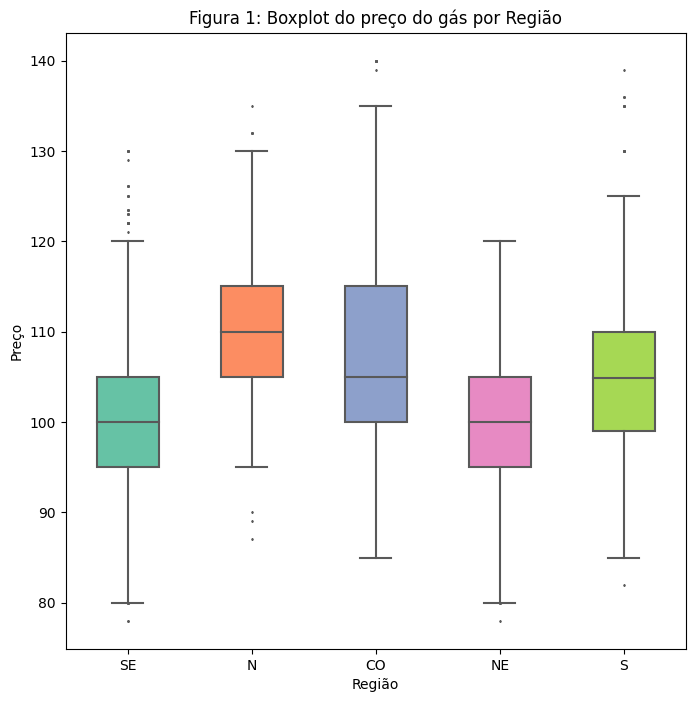

In [ ]:
# Informações de preço e Regiao
preco_regiao = precogas.select(col('Regiao').alias('Região'), col('Valor_de_Venda').alias('Preço')).toPandas()

# Importando as bibliotecas graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando o boxplot
plt.figure(figsize = (8,8))
sns.boxplot(data=preco_regiao, y = 'Preço', x = 'Região',
            orient = 'v', palette = 'Set2', fliersize = 1,
            width=0.5, saturation=1)
plt.title('Figura 1: Boxplot do preço do gás por Região')
plt.show()

A mediana é o valor central de um conjunto de dados, quando o mesmo está organizado em ordem crescente. A mediana divide o conjunto em duas partes: 50% dos valores serão iguais ou inferiores a ela, e os outros 50% serão iguais ou superiores.

Através da figura é possível observar que todas as regiões apresentam valores discrepantes e a região Centro Oeste é a que possui maior variabilidade nos preços. Também é verificado que a distribuição dos preços do gás nas regiões Sudeste e Nordeste apresenta comportamento parecido, e a mediana dessas regiões é menor quando comparada às outras.


